In [2]:
#importing the data
from sklearn.datasets import load_iris
iris = load_iris()

#creating X (features) and y(responses)
X = iris.data
y = iris.target

In [3]:
#importing the class
from sklearn.linear_model import LogisticRegression

#instantiating the model
logreg = LogisticRegression()

#Fittingthemodel
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
#predict and store the response values for X using the model we had generated above
y_pred = logreg.predict(X)

In [5]:
#checking the number of predictions generated
len(y_pred)

150

Classification accuracy:
    proportion of correct predictinos
    common evaluation metric for classification problems

In [6]:
# computing classification Accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.96


In [8]:
#We had generated the TRAINING ACCURACY. Tested the model with data from the same set

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [10]:
#Splitting the dataset into two pieces: training / test sets
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
from sklearn.cross_validation import train_test_split

#We split the dataset into halves; each
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [14]:
#Checking that we had indeed split the data
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [15]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [16]:
#Step 2: training the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Step 3: making predictions on the **Testing** set's X. What would our model think of the y for our X's we're going to predict?
y_pred = logreg.predict(X_test)

In [19]:
#Comparing the actual response values (y_test) with the **predicted** response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [20]:
#Repeating for KNN with K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [21]:
#Can we find a better value for K. The for loop iterates through each value of k to find all the scores
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

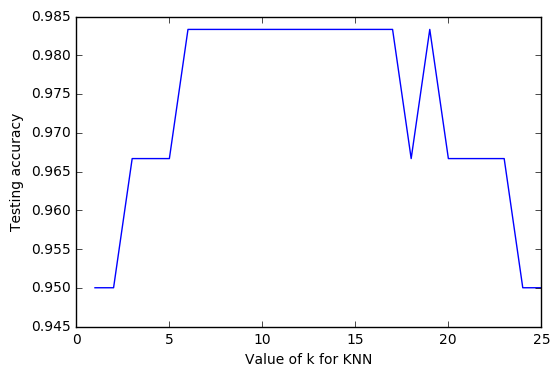

In [22]:
#importing Matplotlib; a scientific plotting library:
import matplotlib.pyplot as plt

#allow plots to appear within the notebook
%matplotlib inline

#plotting the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

In [ ]:
#it is important in the end to use ALL of the available data to make predictions on out-of-sample data.